1. [432](#432)
2. [433](#433)
3. [436](#436)
4. [457](#457)
5. [1402](#1402)
6. [1518](#1518)
7. [1521](#1521)
8. [1882](#1882)
9. [2086](#2086)    
10. [2087](#2087)
11. [2088](#2088)
12. [2089](#2089)
13. [2090](#2090)
14. [2097](#2097)
15. [2260](#2260)
16. [2261](#2261)
17. [2282](#2282)
18. [2416](#2416)

In [1]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places

C:\Users\Robert\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Robert\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 432 <a name="432"></a>

In [2]:
road_432_X = pd.read_csv('x_432.csv')
road_432_y = pd.read_csv('y_432.csv')

In [7]:
road_432_X

,Is_weekend,morning_peak,evening_peak,neighbour1,neighbour2,neighbour3,neighbour4,432_prev_1,432_prev_2,432_prev_3,432_prev_4,432_prev_5,432_prev_6
0,1,0,0,0.0000,0.0000,0.0000,0.0000,9.0158,9.4310,9.8863,8.8488,7.4662,7.4275
1,1,0,0,0.0000,0.0000,0.0000,0.0000,8.3344,9.0158,9.4310,9.8863,8.8488,7.4662
2,1,0,0,0.0000,0.0000,0.0000,0.0000,10.1667,8.3344,9.0158,9.4310,9.8863,8.8488
3,1,0,0,0.0000,0.0000,0.0000,0.0000,8.4823,10.1667,8.3344,9.0158,9.4310,9.8863
4,1,0,0,0.0000,0.0000,0.0000,0.0000,7.2767,8.4823,10.1667,8.3344,9.0158,9.4310
5,1,0,0,0.0000,0.0000,0.0000,0.0000,11.3771,7.2767,8.4823,10.1667,8.3344,9.0158
6,1,0,0,0.0000,0.0000,0.0000,0.0000,8.1915,11.3771,7.2767,8.4823,10.1667,8.3344
7,1,0,0,0.0000,0.0000,0.0000,0.0000,8.3831,8.1915,11.3771,7.2767,8.4823,10.1667
8,1,0,0,0.0000,0.0000,0.0000,0.0000,8.5839,8.3831,8.1915,11.3771,7.2767,8.4823
9,1,0,0,0.0000,0.0000,0.0000,0.0000,7.5448,8.5839,8.3831,8.1915,11.3771,7.2767


In [9]:
dates = road_432_y.iloc[:,0:1]
road_432_y = road_432_y.iloc[:,1:2]


In [13]:
# First 23 days of data for training
road_432_X_train = road_432_X.iloc[0:4134,:]

road_432_y_train = road_432_y.iloc[0:4134,:]

# Final 7 days for predicting
road_432_X_test = road_432_X.iloc[4134:,:]

road_432_y_test = road_432_y.iloc[4134:5394,:]
dates = dates.iloc[4140:,:]

print(len(road_432_X_train))
print(len(road_432_X_test))
print(len(road_432_y_train))
print(len(road_432_y_test))

4134
1260
4134
1260


In [14]:
road_432_y_train

,432
0,8.3344
1,10.1667
2,8.4823
3,7.2767
4,11.3771
5,8.1915
6,8.3831
7,8.5839
8,7.5448
9,7.7070


In [32]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
regressor.fit(road_432_X_train, road_432_y_train.values.ravel())

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'sqrt', 'n_estimators': 300}


,mean_test_score,std_test_score,params
0,-0.7516,0.1240,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-0.7500,0.1230,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-0.7515,0.1237,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-0.7505,0.1232,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-0.7501,0.1232,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-0.7504,0.1226,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-0.7704,0.1219,"{'max_features': 'auto', 'n_estimators': 200}"
7,-0.7693,0.1213,"{'max_features': 'auto', 'n_estimators': 300}"
8,-0.7681,0.1211,"{'max_features': 'auto', 'n_estimators': 400}"
9,-0.7681,0.1216,"{'max_features': 'auto', 'n_estimators': 500}"


In [33]:
# Use the optimal parameter setting to make predictions
#regressor = RandomForestRegressor(n_estimators=500, max_features = 'sqrt', random_state = 0) 
#regressor.fit(road_432_X_train, road_432_y_train.values.ravel())  
y_pred = regressor.predict(road_432_X_test)

In [34]:
regressor.score(road_432_X_test, road_432_y_test)

-0.7540941688792224

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(road_432_y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(road_432_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(road_432_y_test, y_pred))) 
print('R Squared:', metrics.r2_score(road_432_y_test, y_pred))

Mean Absolute Error: 0.6460068883236056
Mean Squared Error: 0.7540941688792224
Root Mean Squared Error: 0.8683859561734185
R Squared: 0.6086132999549689


Text(0,0.5,'Feature')

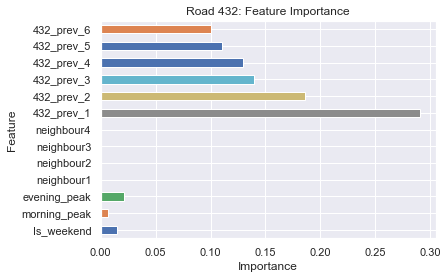

In [37]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=road_432_X.columns)
feat_importances.plot(kind='barh')

feat_importances.plot(kind='barh')
plt.title('Road 432: Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

In [38]:
y_predframe=pd.DataFrame(y_pred, columns=['TT']) 
road_432_y_test=road_432_y_test.reset_index(drop=True)
dates = dates.reset_index(drop=True)

In [39]:
road_432_y_test=road_432_y_test.reset_index(drop=True)


In [40]:
dates = dates.reset_index(drop=True)

In [41]:
# Convert column to datetime
dates['DateTime'] = pd.to_datetime(dates['DateTime'])


In [42]:
cmb = pd.concat([dates, y_predframe, road_432_y_test], axis=1)

In [43]:
#import seaborn as sns; sns.set()
#import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
#plt.scatter(dates, y_predframe, color='black', alpha=0.5, label='Real')
#plt.scatter(X, svr1.predict(X), color='red', label='SVR')
#plt.plot(X, lr.predict(X), color='green', label='LR')
#plt.xlabel('NOX')
#plt.ylabel('MEDV')
#plt.legend()
#plt.show()

#combo.plot()

#ax = sns.lineplot(x="DateTime", y="TT", data=cmb)

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [44]:
# Melt the data so that it can be plotted with seaborn

cmb_df = cmb.melt('DateTime', var_name='cols', value_name='vals')

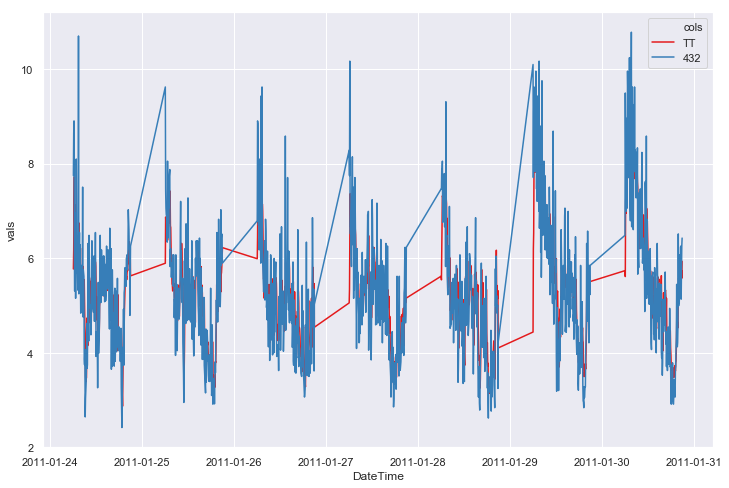

In [45]:
# TRY MELTING FOR SEABORN PLOT
plt.figure(figsize=(12, 8))

g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df, palette="Set1")

<Figure size 864x576 with 0 Axes>

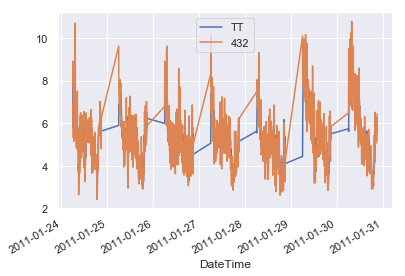

In [46]:
# Matlib plot

plt.figure(figsize=(12, 8))
cmb.plot(x="DateTime", y=["TT", "432"], kind="line")

## 433 <a name="433"></a>

In [47]:
road_433_X = pd.read_csv('x_433.csv')
road_433_y = pd.read_csv('y_433.csv')

dates = road_433_y.iloc[:,0:1]
road_433_y = road_433_y.iloc[:,1:2]

# First 23 days of data for training
road_433_X_train = road_433_X.iloc[0:4134,:]

road_433_y_train = road_433_y.iloc[0:4134,:]

# Final 7 days for predicting
road_433_X_test = road_433_X.iloc[4134:,:]

road_433_y_test = road_433_y.iloc[4134:5394,:]


dates = dates.iloc[4140:,:]


In [48]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700, 1000], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
regressor.fit(road_433_X_train, road_433_y_train.values.ravel())

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'auto', 'n_estimators': 500}


,mean_test_score,std_test_score,params
0,-0.6576,0.2022,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-0.6569,0.2028,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-0.6558,0.2016,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-0.6556,0.2011,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-0.6560,0.2026,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-0.6545,0.2007,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-0.6542,0.1994,"{'max_features': 'sqrt', 'n_estimators': 1000}"
7,-0.6402,0.1564,"{'max_features': 'auto', 'n_estimators': 200}"
8,-0.6394,0.1563,"{'max_features': 'auto', 'n_estimators': 300}"
9,-0.6365,0.1547,"{'max_features': 'auto', 'n_estimators': 400}"


In [49]:
# Use the optimal parameter setting to make predictions

#regressor = RandomForestRegressor(n_estimators=400, max_features = 'auto', random_state = 0) 
#regressor.fit(road_432_X_train, road_432_y_train.values.ravel()) 

y_pred = regressor.predict(road_433_X_test)
regressor.score(road_433_X_test, road_433_y_test)

-0.519833653360797

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(road_433_y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(road_433_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(road_433_y_test, y_pred))) 
print('R Squared:', metrics.r2_score(road_433_y_test, y_pred))

Mean Absolute Error: 0.5557779798953435
Mean Squared Error: 0.519833653360797
Root Mean Squared Error: 0.7209949052252707
R Squared: 0.5468634658809117


Text(0,0.5,'Feature')

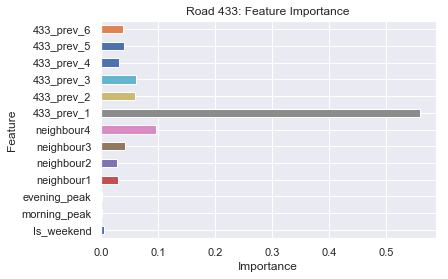

In [51]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=road_433_X.columns)


feat_importances.plot(kind='barh')
plt.title('Road 433: Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')


In [52]:
y_predframe=pd.DataFrame(y_pred, columns=['TT']) 
road_433_y_test=road_433_y_test.reset_index(drop=True)
dates = dates.reset_index(drop=True)

road_433_y_test=road_433_y_test.reset_index(drop=True)

dates = dates.reset_index(drop=True)

# Convert column to datetime
dates['DateTime'] = pd.to_datetime(dates['DateTime'])

cmb = pd.concat([dates, y_predframe, road_433_y_test], axis=1)

In [53]:
# Melt the data so that it can be plotted with seaborn

cmb_df = cmb.melt('DateTime', var_name='cols', value_name='vals')

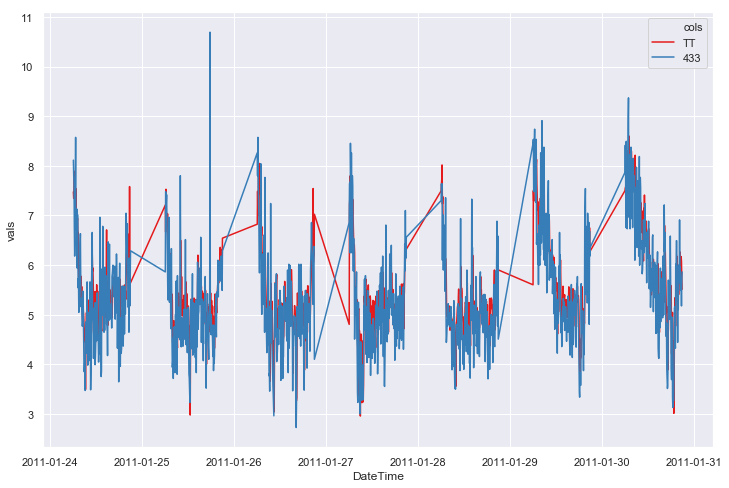

In [54]:
# SEABORN PLOT
plt.figure(figsize=(12, 8))

g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df, palette="Set1")

<Figure size 864x576 with 0 Axes>

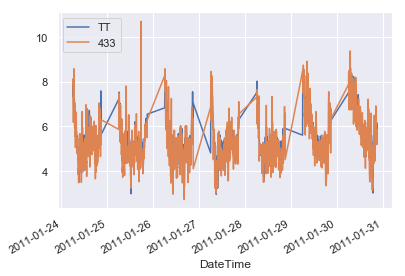

In [55]:
#MATLIB PLOT

plt.figure(figsize=(12, 8))
cmb.plot(x="DateTime", y=["TT", "433"], kind="line")

## 436 <a name="436"></a>

In [56]:
road_436_X = pd.read_csv('x_436.csv')
road_436_y = pd.read_csv('y_436.csv')

dates = road_436_y.iloc[:,0:1]
road_436_y = road_436_y.iloc[:,1:2]

# First 23 days of data for training
road_436_X_train = road_436_X.iloc[0:4134,:]

road_436_y_train = road_436_y.iloc[0:4134,:]

# Final 7 days for predicting
road_436_X_test = road_436_X.iloc[4134:,:]

road_436_y_test = road_436_y.iloc[4134:5394,:]


dates = dates.iloc[4140:,:]


In [57]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
regressor.fit(road_436_X_train, road_436_y_train.values.ravel())

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'sqrt', 'n_estimators': 700}


,mean_test_score,std_test_score,params
0,-1.0276,0.2113,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-1.0244,0.2099,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-1.0252,0.2120,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-1.0232,0.2122,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-1.0228,0.2122,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-1.0224,0.2123,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-1.0432,0.2219,"{'max_features': 'auto', 'n_estimators': 200}"
7,-1.0435,0.2215,"{'max_features': 'auto', 'n_estimators': 300}"
8,-1.0427,0.2200,"{'max_features': 'auto', 'n_estimators': 400}"
9,-1.0430,0.2177,"{'max_features': 'auto', 'n_estimators': 500}"


In [58]:
# Use the optimal parameter setting to make predictions
 
y_pred = regressor.predict(road_436_X_test)
regressor.score(road_436_X_test, road_436_y_test)

-0.8944442601769189

In [59]:
print('Mean Absolute Error:', metrics.mean_absolute_error(road_436_y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(road_436_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(road_436_y_test, y_pred))) 
print('R Squared:', metrics.r2_score(road_436_y_test, y_pred))

Mean Absolute Error: 0.734125560880842
Mean Squared Error: 0.8944442601769189
Root Mean Squared Error: 0.9457506331887486
R Squared: 0.4246238064350467


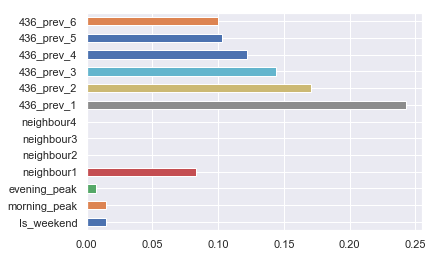

In [60]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=road_436_X.columns)
feat_importances.plot(kind='barh')

In [61]:
y_predframe=pd.DataFrame(y_pred, columns=['TT']) 
road_436_y_test=road_436_y_test.reset_index(drop=True)
dates = dates.reset_index(drop=True)

road_436_y_test=road_436_y_test.reset_index(drop=True)

dates = dates.reset_index(drop=True)

# Convert column to datetime
dates['DateTime'] = pd.to_datetime(dates['DateTime'])

cmb = pd.concat([dates, y_predframe, road_436_y_test], axis=1)

In [62]:
# Melt the data so that it can be plotted with seaborn

cmb_df = cmb.melt('DateTime', var_name='cols', value_name='vals')

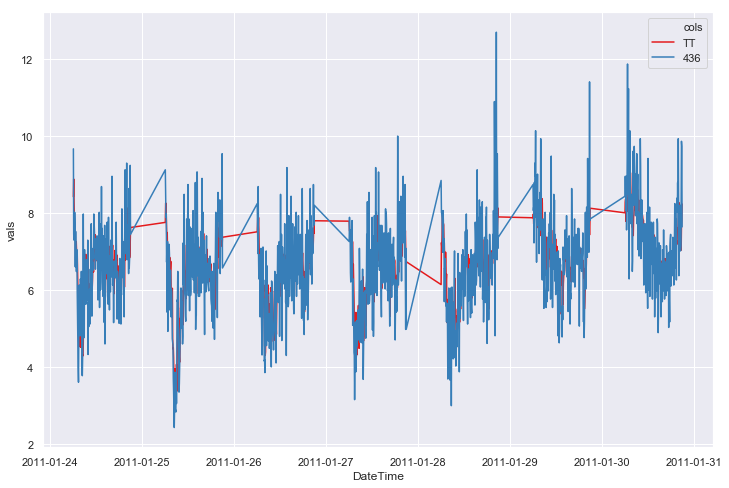

In [63]:
# SEABORN PLOT
plt.figure(figsize=(12, 8))

g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df, palette="Set1")

<Figure size 864x576 with 0 Axes>

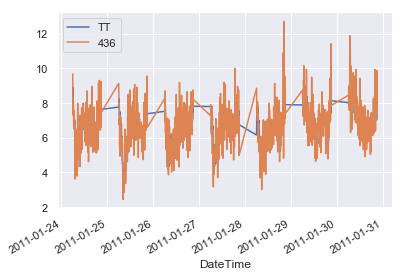

In [64]:
#MATLIB PLOT

plt.figure(figsize=(12, 8))
cmb.plot(x="DateTime", y=["TT", "436"], kind="line")

## 457 <a name="457"></a>

In [65]:
road_457_X = pd.read_csv('x_457.csv')
road_457_y = pd.read_csv('y_457.csv')

dates = road_457_y.iloc[:,0:1]
road_457_y = road_457_y.iloc[:,1:2]

# First 23 days of data for training
road_457_X_train = road_457_X.iloc[0:4134,:]

road_457_y_train = road_457_y.iloc[0:4134,:]

# Final 7 days for predicting
road_457_X_test = road_457_X.iloc[4134:,:]

road_457_y_test = road_457_y.iloc[4134:5394,:]


dates = dates.iloc[4140:,:]


In [66]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
regressor.fit(road_457_X_train, road_457_y_train.values.ravel())

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'sqrt', 'n_estimators': 300}


,mean_test_score,std_test_score,params
0,0.5333,0.0529,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,0.5389,0.0568,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,0.5372,0.0553,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,0.5358,0.0557,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,0.5380,0.0527,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,0.5362,0.0537,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,0.5300,0.0610,"{'max_features': 'auto', 'n_estimators': 200}"
7,0.5319,0.0618,"{'max_features': 'auto', 'n_estimators': 300}"
8,0.5296,0.0579,"{'max_features': 'auto', 'n_estimators': 400}"
9,0.5313,0.0599,"{'max_features': 'auto', 'n_estimators': 500}"


In [67]:
# Use the optimal parameter setting to make predictions
 
y_pred = regressor.predict(road_457_X_test)
regressor.score(road_457_X_test, road_457_y_test)

0.5949724920533022

In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(road_457_y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(road_457_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(road_457_y_test, y_pred))) 
print('R Squared:', metrics.r2_score(road_457_y_test, y_pred))

Mean Absolute Error: 0.7925663818472628
Mean Squared Error: 1.016073326426502
Root Mean Squared Error: 1.0080046261930062
R Squared: 0.5949724920533022


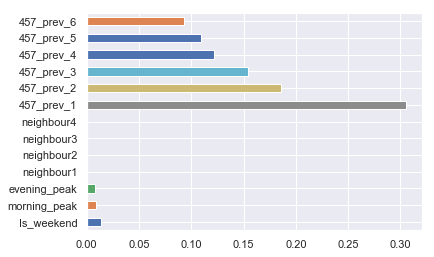

In [69]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=road_457_X.columns)
feat_importances.plot(kind='barh')

In [70]:
y_predframe=pd.DataFrame(y_pred, columns=['TT']) 
road_457_y_test=road_457_y_test.reset_index(drop=True)
dates = dates.reset_index(drop=True)

road_457_y_test=road_457_y_test.reset_index(drop=True)

dates = dates.reset_index(drop=True)

# Convert column to datetime
dates['DateTime'] = pd.to_datetime(dates['DateTime'])

cmb = pd.concat([dates, y_predframe, road_457_y_test], axis=1)

In [71]:
# Melt the data so that it can be plotted with seaborn

cmb_df = cmb.melt('DateTime', var_name='cols', value_name='vals')

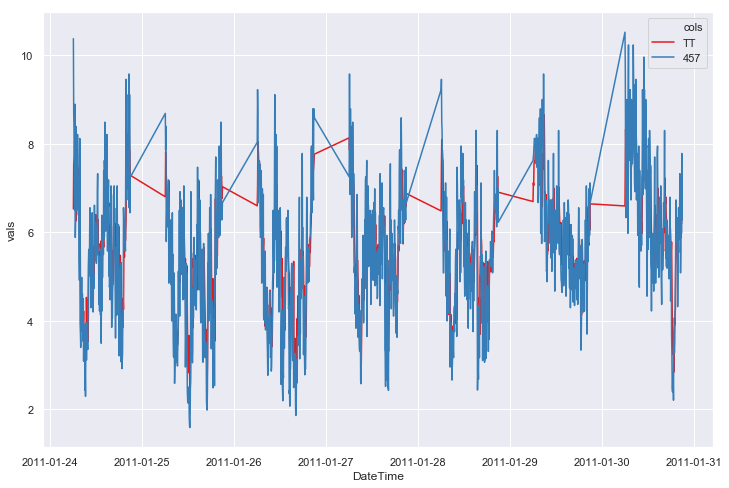

In [72]:
# SEABORN PLOT
plt.figure(figsize=(12, 8))

g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df, palette="Set1")

<Figure size 864x576 with 0 Axes>

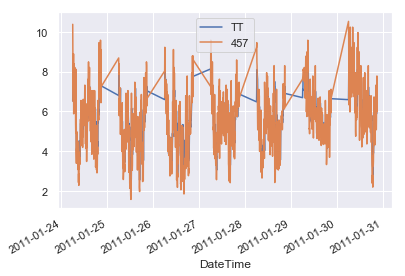

In [73]:
#MATLIB PLOT

plt.figure(figsize=(12, 8))
cmb.plot(x="DateTime", y=["TT", "457"], kind="line")

## 1402 <a name="1402"></a>

In [254]:
road_1402_X = pd.read_csv('x_1402.csv')
road_1402_y = pd.read_csv('y_1402.csv')

dates = road_1402_y.iloc[:,0:1]
road_1402_y = road_1402_y.iloc[:,1:2]

# First 23 days of data for training
road_1402_X_train = road_1402_X.iloc[0:4134,:]

road_1402_y_train = road_1402_y.iloc[0:4134,:]

# Final 7 days for predicting
road_1402_X_test = road_1402_X.iloc[4134:,:]

road_1402_y_test = road_1402_y.iloc[4134:5394,:]


dates = dates.iloc[4140:,:]


In [255]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
regressor.fit(road_1402_X_train, road_1402_y_train.values.ravel())

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'auto', 'n_estimators': 700}


,mean_test_score,std_test_score,params
0,-11.0281,1.4084,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-10.9700,1.4324,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-10.9408,1.4498,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-10.9321,1.4478,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-10.9016,1.4543,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-10.8997,1.4596,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-10.8719,1.1083,"{'max_features': 'auto', 'n_estimators': 200}"
7,-10.8589,1.0690,"{'max_features': 'auto', 'n_estimators': 300}"
8,-10.8728,1.0878,"{'max_features': 'auto', 'n_estimators': 400}"
9,-10.8719,1.0905,"{'max_features': 'auto', 'n_estimators': 500}"


In [76]:
# Use the optimal parameter setting to make predictions
 
y_pred = regressor.predict(road_1402_X_test)
regressor.score(road_1402_X_test, road_1402_y_test)

-11.623171587907528

In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(road_1402_y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(road_1402_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(road_1402_y_test, y_pred))) 
print('R Squared:', metrics.r2_score(road_1402_y_test, y_pred))

Mean Absolute Error: 2.611424323642289
Mean Squared Error: 11.623171587907528
Root Mean Squared Error: 3.4092772823440933
R Squared: 0.35220537436771093


Text(0,0.5,'Feature')

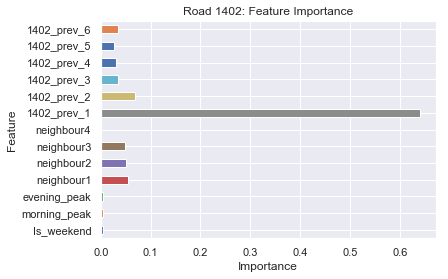

In [78]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=road_1402_X.columns)
feat_importances.plot(kind='barh')

plt.title('Road 1402: Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

In [79]:
y_predframe=pd.DataFrame(y_pred, columns=['TT']) 
road_1402_y_test=road_1402_y_test.reset_index(drop=True)
dates = dates.reset_index(drop=True)

road_1402_y_test=road_1402_y_test.reset_index(drop=True)

dates = dates.reset_index(drop=True)

# Convert column to datetime
dates['DateTime'] = pd.to_datetime(dates['DateTime'])

cmb = pd.concat([dates, y_predframe, road_1402_y_test], axis=1)

In [80]:
# Melt the data so that it can be plotted with seaborn

cmb_df = cmb.melt('DateTime', var_name='cols', value_name='vals')

In [ ]:
cmb_df_1402 = cmb_df

cmb_df_1402

cmb_df_14022=cmb_df_1402.sort_values(by=['cols', 'DateTime'])

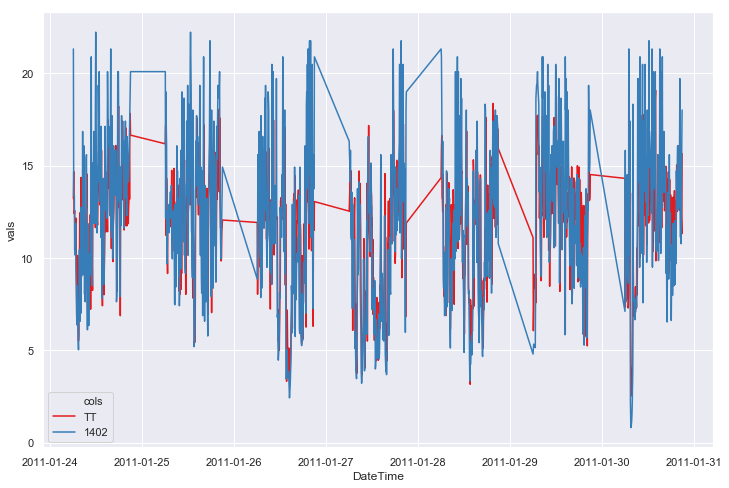

In [81]:
# SEABORN PLOT
plt.figure(figsize=(16, 5))

#g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df, palette="Set1")


#plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df_14022, palette="husl")
g.set_title('Road 1402: Predicted vs Actual Travel Speed')
g.set_ylabel('Travel Speed')
g.set_xlabel('Date')

handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles[1:], labels=labels[1:])

<Figure size 864x576 with 0 Axes>

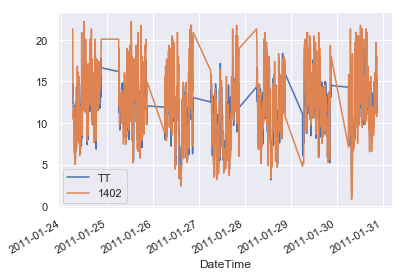

In [82]:
#MATLIB PLOT

plt.figure(figsize=(12, 8))
cmb.plot(x="DateTime", y=["TT", "1402"], kind="line")

## 1518 <a name="1518"></a>

In [83]:
road_1518_X = pd.read_csv('x_1518.csv')
road_1518_y = pd.read_csv('y_1518.csv')

dates = road_1518_y.iloc[:,0:1]
road_1518_y = road_1518_y.iloc[:,1:2]

# First 23 days of data for training
road_1518_X_train = road_1518_X.iloc[0:4134,:]

road_1518_y_train = road_1518_y.iloc[0:4134,:]

# Final 7 days for predicting
road_1518_X_test = road_1518_X.iloc[4134:,:]

road_1518_y_test = road_1518_y.iloc[4134:5394,:]


dates = dates.iloc[4140:,:]


In [84]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
regressor.fit(road_1518_X_train, road_1518_y_train.values.ravel())

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'sqrt', 'n_estimators': 700}


,mean_test_score,std_test_score,params
0,-0.8471,0.0928,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-0.8459,0.0950,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-0.8467,0.0962,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-0.8467,0.0954,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-0.8451,0.0948,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-0.8440,0.0946,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-0.8531,0.0899,"{'max_features': 'auto', 'n_estimators': 200}"
7,-0.8513,0.0881,"{'max_features': 'auto', 'n_estimators': 300}"
8,-0.8494,0.0885,"{'max_features': 'auto', 'n_estimators': 400}"
9,-0.8498,0.0885,"{'max_features': 'auto', 'n_estimators': 500}"


In [85]:
# Use the optimal parameter setting to make predictions
 
y_pred = regressor.predict(road_1518_X_test)
regressor.score(road_1518_X_test, road_1518_y_test)

-0.7078046866257331

In [86]:
print('Mean Absolute Error:', metrics.mean_absolute_error(road_1518_y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(road_1518_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(road_1518_y_test, y_pred)))
print('R Squared:', metrics.r2_score(road_1518_y_test, y_pred))

Mean Absolute Error: 0.6399509201434609
Mean Squared Error: 0.7078046866257331
Root Mean Squared Error: 0.8413112899668785
R Squared: 0.5561421268548448


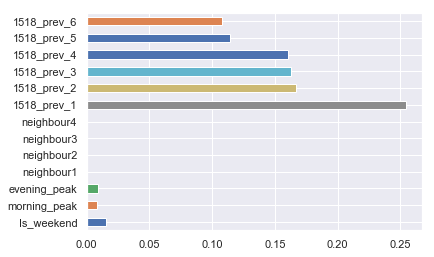

In [87]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=road_1518_X.columns)
feat_importances.plot(kind='barh')

In [88]:
y_predframe=pd.DataFrame(y_pred, columns=['TT']) 
road_1518_y_test=road_1518_y_test.reset_index(drop=True)
dates = dates.reset_index(drop=True)

road_1518_y_test=road_1518_y_test.reset_index(drop=True)

dates = dates.reset_index(drop=True)

# Convert column to datetime
dates['DateTime'] = pd.to_datetime(dates['DateTime'])

cmb = pd.concat([dates, y_predframe, road_1518_y_test], axis=1)

In [89]:
# Melt the data so that it can be plotted with seaborn

cmb_df = cmb.melt('DateTime', var_name='cols', value_name='vals')

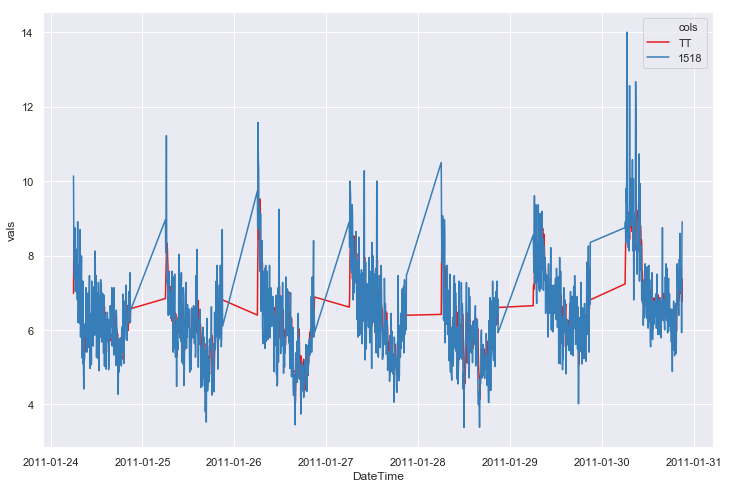

In [90]:
# SEABORN PLOT
plt.figure(figsize=(12, 8))

g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df, palette="Set1")

<Figure size 864x576 with 0 Axes>

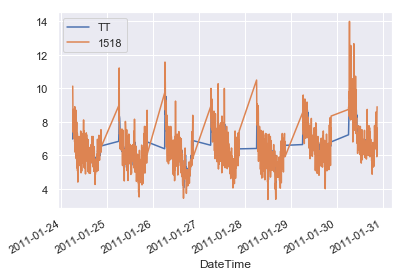

In [91]:
#MATLIB PLOT

plt.figure(figsize=(12, 8))
cmb.plot(x="DateTime", y=["TT", "1518"], kind="line")

## 1521 <a name="1521"></a>

In [92]:
road_1521_X = pd.read_csv('x_1521.csv')
road_1521_y = pd.read_csv('y_1521.csv')

dates = road_1521_y.iloc[:,0:1]
road_1521_y = road_1521_y.iloc[:,1:2]

# First 23 days of data for training
road_1521_X_train = road_1521_X.iloc[0:4134,:]

road_1521_y_train = road_1521_y.iloc[0:4134,:]

# Final 7 days for predicting
road_1521_X_test = road_1521_X.iloc[4134:,:]

road_1521_y_test = road_1521_y.iloc[4134:5394,:]


dates = dates.iloc[4140:,:]


In [93]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
regressor.fit(road_1521_X_train, road_1521_y_train.values.ravel())

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'auto', 'n_estimators': 300}


,mean_test_score,std_test_score,params
0,-17.6051,3.1658,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-17.5186,3.1191,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-17.5349,3.1269,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-17.5503,3.1092,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-17.5678,3.0927,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-17.5527,3.0961,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-17.4741,3.1057,"{'max_features': 'auto', 'n_estimators': 200}"
7,-17.3975,3.0119,"{'max_features': 'auto', 'n_estimators': 300}"
8,-17.4324,3.0317,"{'max_features': 'auto', 'n_estimators': 400}"
9,-17.4530,3.0467,"{'max_features': 'auto', 'n_estimators': 500}"


In [94]:
# Use the optimal parameter setting to make predictions
 
y_pred = regressor.predict(road_1521_X_test)
#regressor.score(road_1521_X_test, road_1521_y_test)


In [95]:
print('Mean Absolute Error:', metrics.mean_absolute_error(road_1521_y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(road_1521_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(road_1521_y_test, y_pred))) 
print('R Squared:', metrics.r2_score(road_1521_y_test, y_pred))

Mean Absolute Error: 0.5340396856311584
Mean Squared Error: 0.8365459094575775
Root Mean Squared Error: 0.9146288369921306
R Squared: -1.2972173377685174


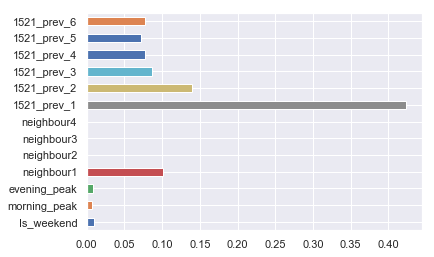

In [96]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=road_1521_X.columns)
feat_importances.plot(kind='barh')

In [97]:
y_predframe=pd.DataFrame(y_pred, columns=['TT']) 
road_1521_y_test=road_1521_y_test.reset_index(drop=True)
dates = dates.reset_index(drop=True)

road_1521_y_test=road_1521_y_test.reset_index(drop=True)

dates = dates.reset_index(drop=True)

# Convert column to datetime
dates['DateTime'] = pd.to_datetime(dates['DateTime'])

cmb = pd.concat([dates, y_predframe, road_1521_y_test], axis=1)

# Rename column titles
cmb = cmb.rename(columns={'TT': 'Predicted', '1521': 'Actual'})

In [98]:
# Melt the data so that it can be plotted with seaborn

cmb_df = cmb.melt('DateTime', var_name='cols', value_name='vals')

In [99]:
cmb_df_1521 = cmb_df

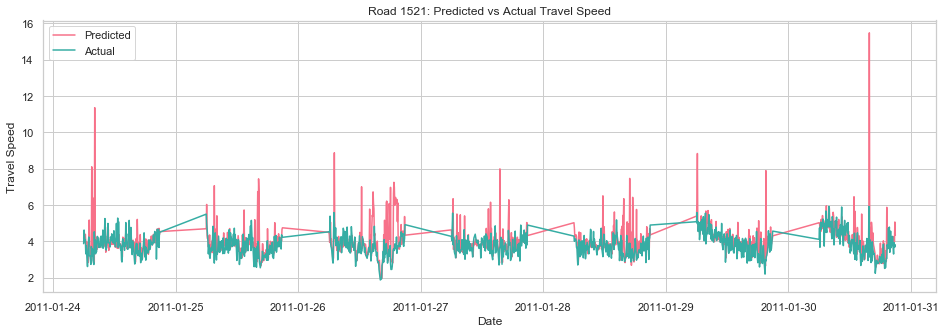

In [102]:
# SEABORN PLOT
plt.figure(figsize=(16, 5))
sns.set(style="whitegrid")
g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df_1521, palette="husl")
g.set_title('Road 1521: Predicted vs Actual Travel Speed')
g.set_ylabel('Travel Speed')
g.set_xlabel('Date')

handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles[1:], labels=labels[1:])

In [103]:
#MATLIB PLOT

#plt.figure(figsize=(12, 8))
#cmb.plot(x="DateTime", y=["TT", "1521"], kind="line")

## 1882 <a name="1882"></a>

In [245]:
road_1882_X = pd.read_csv('x_1882.csv')
road_1882_y = pd.read_csv('y_1882.csv')

dates = road_1882_y.iloc[:,0:1]
road_1882_y = road_1882_y.iloc[:,1:2]

# First 23 days of data for training
road_1882_X_train = road_1882_X.iloc[0:4134,:]

road_1882_y_train = road_1882_y.iloc[0:4134,:]

# Final 7 days for predicting
road_1882_X_test = road_1882_X.iloc[4134:,:]

road_1882_y_test = road_1882_y.iloc[4134:5394,:]


dates = dates.iloc[4140:,:]


In [246]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
regressor.fit(road_1882_X_train, road_1882_y_train.values.ravel())

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'auto', 'n_estimators': 500}


,mean_test_score,std_test_score,params
0,-0.5003,0.0976,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-0.4991,0.0972,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-0.5000,0.0988,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-0.4994,0.0972,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-0.4997,0.0978,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-0.4996,0.0973,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-0.4963,0.0768,"{'max_features': 'auto', 'n_estimators': 200}"
7,-0.4961,0.0754,"{'max_features': 'auto', 'n_estimators': 300}"
8,-0.4963,0.0744,"{'max_features': 'auto', 'n_estimators': 400}"
9,-0.4959,0.0738,"{'max_features': 'auto', 'n_estimators': 500}"


In [247]:
# Use the optimal parameter setting to make predictions
 
y_pred = regressor.predict(road_1882_X_test)
regressor.score(road_1882_X_test, road_1882_y_test)

-0.44987345439713433

In [248]:
print('Mean Absolute Error:', metrics.mean_absolute_error(road_1882_y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(road_1882_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(road_1882_y_test, y_pred))) 
print('R Squared:', metrics.r2_score(road_1882_y_test, y_pred))

Mean Absolute Error: 0.485729934066563
Mean Squared Error: 0.44987345439713433
Root Mean Squared Error: 0.6707260650944873
R Squared: 0.9146191130094558


Text(0,0.5,'Feature')

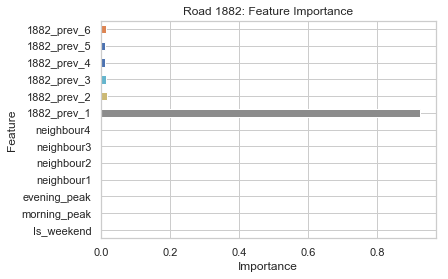

In [249]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=road_1882_X.columns)
feat_importances.plot(kind='barh')

plt.title('Road 1882: Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

In [250]:
y_predframe=pd.DataFrame(y_pred, columns=['TT']) 
road_1882_y_test=road_1882_y_test.reset_index(drop=True)
dates = dates.reset_index(drop=True)

road_1882_y_test=road_1882_y_test.reset_index(drop=True)

dates = dates.reset_index(drop=True)

# Convert column to datetime
dates['DateTime'] = pd.to_datetime(dates['DateTime'])

cmb = pd.concat([dates, y_predframe, road_1882_y_test], axis=1)

# Rename column titles
cmb = cmb.rename(columns={'TT': 'Predicted', '1882': 'Actual'})

In [251]:
# Melt the data so that it can be plotted with seaborn

cmb_df = cmb.melt('DateTime', var_name='cols', value_name='vals')

In [252]:
cmb_df_1882 = cmb_df

cmb_df_18822=cmb_df_1882.sort_values(by=['cols', 'DateTime'])

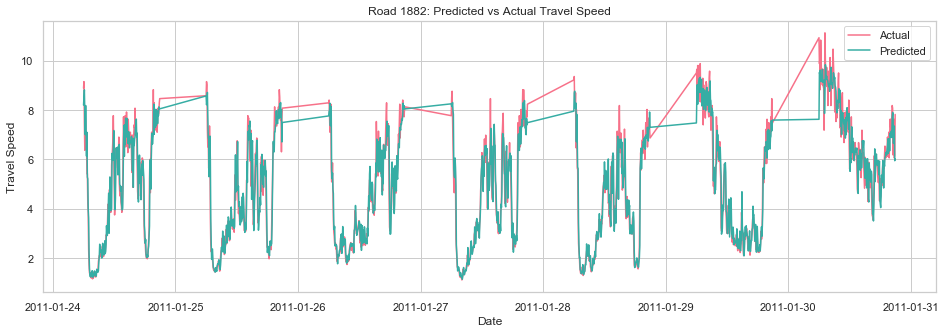

In [253]:
# SEABORN PLOT
plt.figure(figsize=(16, 5))

#g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df, palette="Set1")


#plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df_18822, palette="husl")
g.set_title('Road 1882: Predicted vs Actual Travel Speed')
g.set_ylabel('Travel Speed')
g.set_xlabel('Date')

handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles[1:], labels=labels[1:])

In [115]:
#MATLIB PLOT

#plt.figure(figsize=(12, 8))
#cmb.plot(x="DateTime", y=["TT", "1882"], kind="line")

## 2086 <a name="2086"></a>

In [227]:
road_2086_X = pd.read_csv('x_2086.csv')
road_2086_y = pd.read_csv('y_2086.csv')

dates = road_2086_y.iloc[:,0:1]
road_2086_y = road_2086_y.iloc[:,1:2]

# First 23 days of data for training
road_2086_X_train = road_2086_X.iloc[0:4134,:]

road_2086_y_train = road_2086_y.iloc[0:4134,:]

# Final 7 days for predicting
road_2086_X_test = road_2086_X.iloc[4134:,:]

road_2086_y_test = road_2086_y.iloc[4134:5394,:]


dates = dates.iloc[4140:,:]


In [228]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
regressor.fit(road_2086_X_train, road_2086_y_train.values.ravel())

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'auto', 'n_estimators': 300}


,mean_test_score,std_test_score,params
0,-0.5292,0.0887,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-0.5270,0.0860,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-0.5271,0.0863,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-0.5275,0.0875,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-0.5274,0.0880,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-0.5276,0.0886,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-0.5203,0.0497,"{'max_features': 'auto', 'n_estimators': 200}"
7,-0.5187,0.0479,"{'max_features': 'auto', 'n_estimators': 300}"
8,-0.5199,0.0494,"{'max_features': 'auto', 'n_estimators': 400}"
9,-0.5199,0.0511,"{'max_features': 'auto', 'n_estimators': 500}"


In [229]:
# Use the optimal parameter setting to make predictions
 
y_pred = regressor.predict(road_2086_X_test)
regressor.score(road_2086_X_test, road_2086_y_test)

-0.4562558359423709

In [230]:
print('Mean Absolute Error:', metrics.mean_absolute_error(road_2086_y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(road_2086_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(road_2086_y_test, y_pred))) 
print('R Squared:', metrics.r2_score(road_2086_y_test, y_pred))

Mean Absolute Error: 0.5220108206184338
Mean Squared Error: 0.4562558359423709
Root Mean Squared Error: 0.6754671242498563
R Squared: 0.19886964619614889


Text(0,0.5,'Feature')

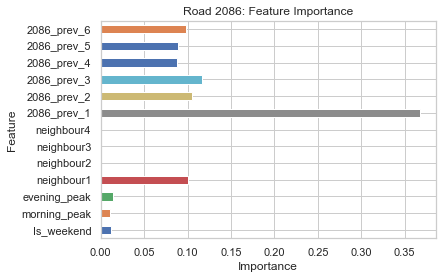

In [231]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=road_2086_X.columns)
feat_importances.plot(kind='barh')
plt.title('Road 2086: Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

In [236]:
y_predframe=pd.DataFrame(y_pred, columns=['TT']) 
road_2086_y_test=road_2086_y_test.reset_index(drop=True)
dates = dates.reset_index(drop=True)

road_2086_y_test=road_2086_y_test.reset_index(drop=True)

dates = dates.reset_index(drop=True)

# Convert column to datetime
dates['DateTime'] = pd.to_datetime(dates['DateTime'])

cmb = pd.concat([dates, y_predframe, road_2086_y_test], axis=1)

# Rename column titles
cmb = cmb.rename(columns={'TT': 'Predicted', '2086': 'Actual'})

In [237]:
# Melt the data so that it can be plotted with seaborn

cmb_df = cmb.melt('DateTime', var_name='cols', value_name='vals')

In [241]:
cmb_df_2086 = cmb_df

cmb_df_2086

cmb_df_20862=cmb_df_2086.sort_values(by=['cols', 'DateTime'])

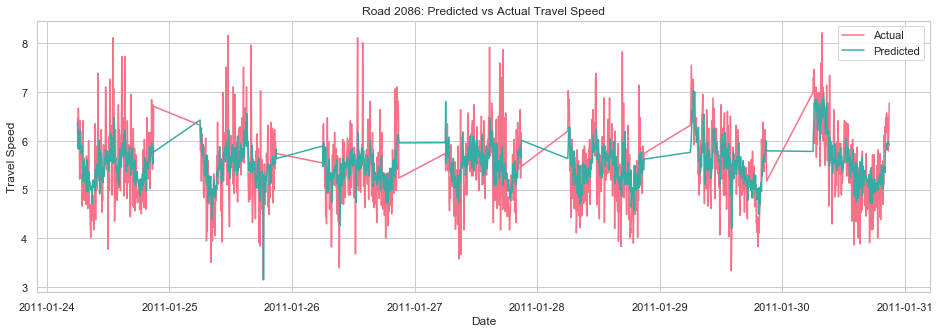

In [242]:
# SEABORN PLOT

plt.figure(figsize=(16, 5))

#g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df, palette="Set1")


#plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df_20862, palette="husl")
g.set_title('Road 2086: Predicted vs Actual Travel Speed')
g.set_ylabel('Travel Speed')
g.set_xlabel('Date')

handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles[1:], labels=labels[1:])

<Figure size 864x576 with 0 Axes>

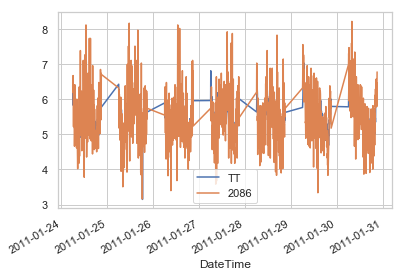

In [124]:
#MATLIB PLOT

plt.figure(figsize=(12, 8))
cmb.plot(x="DateTime", y=["TT", "2086"], kind="line")

## 2087 <a name="2087"></a>

In [125]:
road_2087_X = pd.read_csv('x_2087.csv')
road_2087_y = pd.read_csv('y_2087.csv')

dates = road_2087_y.iloc[:,0:1]
road_2087_y = road_2087_y.iloc[:,1:2]

# First 23 days of data for training
road_2087_X_train = road_2087_X.iloc[0:4134,:]

road_2087_y_train = road_2087_y.iloc[0:4134,:]

# Final 7 days for predicting
road_2087_X_test = road_2087_X.iloc[4134:,:]

road_2087_y_test = road_2087_y.iloc[4134:5394,:]


dates = dates.iloc[4140:,:]


In [126]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
regressor.fit(road_2087_X_train, road_2087_y_train.values.ravel())

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'sqrt', 'n_estimators': 500}


,mean_test_score,std_test_score,params
0,-0.6268,0.0702,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-0.6260,0.0697,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-0.6257,0.0701,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-0.6255,0.0701,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-0.6256,0.0708,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-0.6256,0.0708,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-0.6444,0.0744,"{'max_features': 'auto', 'n_estimators': 200}"
7,-0.6425,0.0763,"{'max_features': 'auto', 'n_estimators': 300}"
8,-0.6413,0.0752,"{'max_features': 'auto', 'n_estimators': 400}"
9,-0.6416,0.0749,"{'max_features': 'auto', 'n_estimators': 500}"


In [127]:
# Use the optimal parameter setting to make predictions
 
y_pred = regressor.predict(road_2087_X_test)
regressor.score(road_2087_X_test, road_2087_y_test)

-0.5469244913095008

In [128]:
print('Mean Absolute Error:', metrics.mean_absolute_error(road_2087_y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(road_2087_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(road_2087_y_test, y_pred))) 
print('R Squared:', metrics.r2_score(road_2087_y_test, y_pred))

Mean Absolute Error: 0.5705606550263166
Mean Squared Error: 0.5469244913095008
Root Mean Squared Error: 0.739543434363054
R Squared: 0.3475210432423268


Text(0,0.5,'Feature')

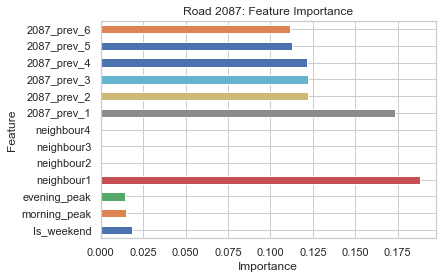

In [129]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=road_2087_X.columns)
feat_importances.plot(kind='barh')

plt.title('Road 2087: Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

In [130]:
y_predframe=pd.DataFrame(y_pred, columns=['TT']) 
road_2087_y_test=road_2087_y_test.reset_index(drop=True)
dates = dates.reset_index(drop=True)

road_2087_y_test=road_2087_y_test.reset_index(drop=True)

dates = dates.reset_index(drop=True)

# Convert column to datetime
dates['DateTime'] = pd.to_datetime(dates['DateTime'])

cmb = pd.concat([dates, y_predframe, road_2087_y_test], axis=1)

In [131]:
# Melt the data so that it can be plotted with seaborn

cmb_df = cmb.melt('DateTime', var_name='cols', value_name='vals')

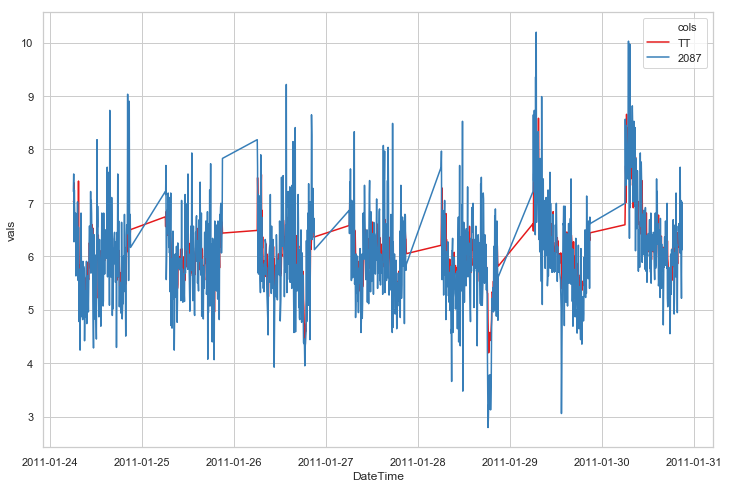

In [132]:
# SEABORN PLOT
plt.figure(figsize=(12, 8))

g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df, palette="Set1")

<Figure size 864x576 with 0 Axes>

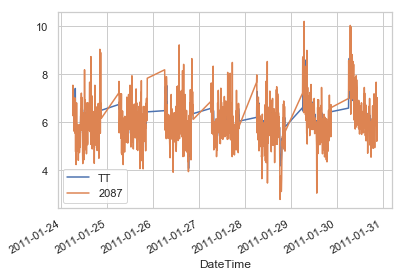

In [133]:
#MATLIB PLOT

plt.figure(figsize=(12, 8))
cmb.plot(x="DateTime", y=["TT", "2087"], kind="line")

## 2088 <a name="2088"></a>

In [134]:
road_2088_X = pd.read_csv('x_2088.csv')
road_2088_y = pd.read_csv('y_2088.csv')

dates = road_2088_y.iloc[:,0:1]
road_2088_y = road_2088_y.iloc[:,1:2]

# First 23 days of data for training
road_2088_X_train = road_2088_X.iloc[0:4134,:]

road_2088_y_train = road_2088_y.iloc[0:4134,:]

# Final 7 days for predicting
road_2088_X_test = road_2088_X.iloc[4134:,:]

road_2088_y_test = road_2088_y.iloc[4134:5394,:]


dates = dates.iloc[4140:,:]


In [135]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
regressor.fit(road_2088_X_train, road_2088_y_train.values.ravel())

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'sqrt', 'n_estimators': 700}


,mean_test_score,std_test_score,params
0,-0.7862,0.1467,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-0.7824,0.1475,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-0.7825,0.1476,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-0.7818,0.1468,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-0.7812,0.1463,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-0.7808,0.1461,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-0.7901,0.1429,"{'max_features': 'auto', 'n_estimators': 200}"
7,-0.7902,0.1436,"{'max_features': 'auto', 'n_estimators': 300}"
8,-0.7900,0.1433,"{'max_features': 'auto', 'n_estimators': 400}"
9,-0.7893,0.1430,"{'max_features': 'auto', 'n_estimators': 500}"


In [136]:
# Use the optimal parameter setting to make predictions
 
y_pred = regressor.predict(road_2088_X_test)
regressor.score(road_2088_X_test, road_2088_y_test)

-0.7744050044368789

In [137]:
print('Mean Absolute Error:', metrics.mean_absolute_error(road_2088_y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(road_2088_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(road_2088_y_test, y_pred))) 
print('R Squared:', metrics.r2_score(road_2088_y_test, y_pred))

Mean Absolute Error: 0.6396420296176264
Mean Squared Error: 0.7744050044368789
Root Mean Squared Error: 0.880002843425451
R Squared: 0.5162884230086641


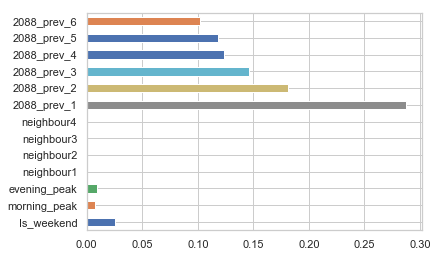

In [138]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=road_2088_X.columns)
feat_importances.plot(kind='barh')

In [139]:
y_predframe=pd.DataFrame(y_pred, columns=['TT']) 
road_2088_y_test=road_2088_y_test.reset_index(drop=True)
dates = dates.reset_index(drop=True)

road_2088_y_test=road_2088_y_test.reset_index(drop=True)

dates = dates.reset_index(drop=True)

# Convert column to datetime
dates['DateTime'] = pd.to_datetime(dates['DateTime'])

cmb = pd.concat([dates, y_predframe, road_2088_y_test], axis=1)

In [140]:
# Melt the data so that it can be plotted with seaborn

cmb_df = cmb.melt('DateTime', var_name='cols', value_name='vals')

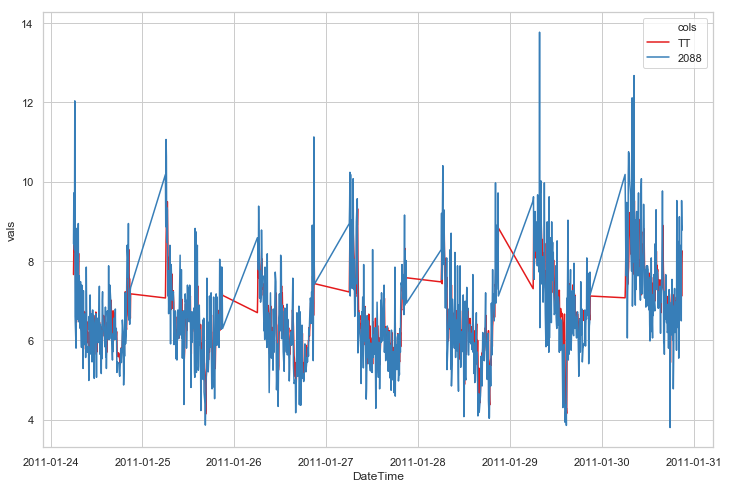

In [141]:
# SEABORN PLOT
plt.figure(figsize=(12, 8))

g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df, palette="Set1")

<Figure size 864x576 with 0 Axes>

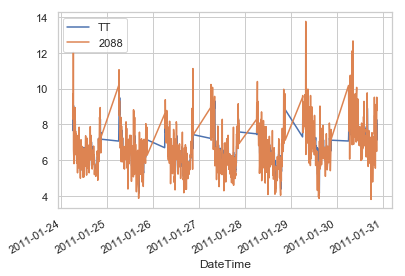

In [142]:
#MATLIB PLOT

plt.figure(figsize=(12, 8))
cmb.plot(x="DateTime", y=["TT", "2088"], kind="line")

## 2089 <a name="2089"></a>

In [143]:
road_2089_X = pd.read_csv('x_2089.csv')
road_2089_y = pd.read_csv('y_2089.csv')

dates = road_2089_y.iloc[:,0:1]
road_2089_y = road_2089_y.iloc[:,1:2]

# First 23 days of data for training
road_2089_X_train = road_2089_X.iloc[0:4134,:]

road_2089_y_train = road_2089_y.iloc[0:4134,:]

# Final 7 days for predicting
road_2089_X_test = road_2089_X.iloc[4134:,:]

road_2089_y_test = road_2089_y.iloc[4134:5394,:]


dates = dates.iloc[4140:,:]


In [144]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
regressor.fit(road_2089_X_train, road_2089_y_train.values.ravel())

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'sqrt', 'n_estimators': 400}


,mean_test_score,std_test_score,params
0,-0.5923,0.0419,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-0.5919,0.0429,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-0.5914,0.0436,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-0.5916,0.0437,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-0.5919,0.0434,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-0.5918,0.0431,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-0.6063,0.0382,"{'max_features': 'auto', 'n_estimators': 200}"
7,-0.6053,0.0391,"{'max_features': 'auto', 'n_estimators': 300}"
8,-0.6059,0.0391,"{'max_features': 'auto', 'n_estimators': 400}"
9,-0.6058,0.0387,"{'max_features': 'auto', 'n_estimators': 500}"


In [145]:
# Use the optimal parameter setting to make predictions
 
y_pred = regressor.predict(road_2089_X_test)
regressor.score(road_2089_X_test, road_2089_y_test)

-0.597223992472747

In [146]:
print('Mean Absolute Error:', metrics.mean_absolute_error(road_2089_y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(road_2089_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(road_2089_y_test, y_pred))) 
print('R Squared:', metrics.r2_score(road_2089_y_test, y_pred))

Mean Absolute Error: 0.587831850559891
Mean Squared Error: 0.597223992472747
Root Mean Squared Error: 0.7728026866366
R Squared: 0.49169621474830727


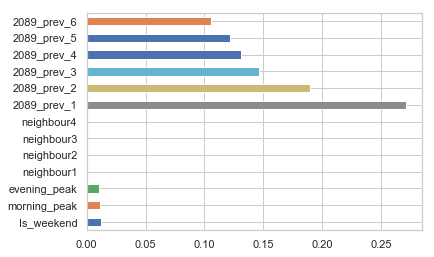

In [147]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=road_2089_X.columns)
feat_importances.plot(kind='barh')

In [148]:
y_predframe=pd.DataFrame(y_pred, columns=['TT']) 
road_2089_y_test=road_2089_y_test.reset_index(drop=True)
dates = dates.reset_index(drop=True)

road_2089_y_test=road_2089_y_test.reset_index(drop=True)

dates = dates.reset_index(drop=True)

# Convert column to datetime
dates['DateTime'] = pd.to_datetime(dates['DateTime'])

cmb = pd.concat([dates, y_predframe, road_2089_y_test], axis=1)

In [149]:
# Melt the data so that it can be plotted with seaborn

cmb_df = cmb.melt('DateTime', var_name='cols', value_name='vals')

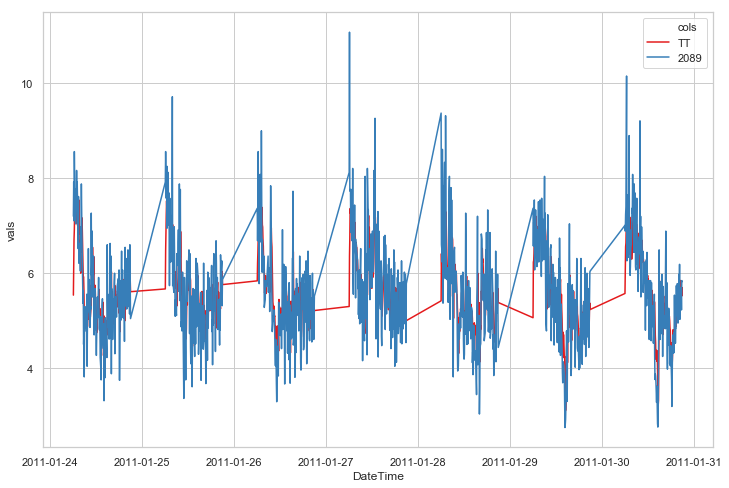

In [150]:
# SEABORN PLOT
plt.figure(figsize=(12, 8))

g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df, palette="Set1")

<Figure size 864x576 with 0 Axes>

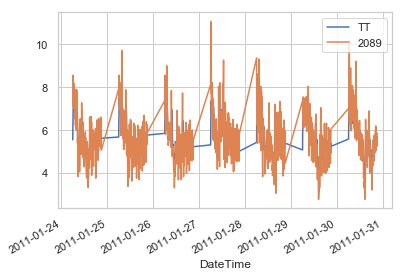

In [151]:
#MATLIB PLOT

plt.figure(figsize=(12, 8))
cmb.plot(x="DateTime", y=["TT", "2089"], kind="line")

## 2090 <a name="2090"></a>

In [152]:
road_2090_X = pd.read_csv('x_2090.csv')
road_2090_y = pd.read_csv('y_2090.csv')

dates = road_2090_y.iloc[:,0:1]
road_2090_y = road_2090_y.iloc[:,1:2]

# First 23 days of data for training
road_2090_X_train = road_2090_X.iloc[0:4134,:]

road_2090_y_train = road_2090_y.iloc[0:4134,:]

# Final 7 days for predicting
road_2090_X_test = road_2090_X.iloc[4134:,:]

road_2090_y_test = road_2090_y.iloc[4134:5394,:]


dates = dates.iloc[4140:,:]


In [153]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
regressor.fit(road_2090_X_train, road_2090_y_train.values.ravel())

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'sqrt', 'n_estimators': 700}


,mean_test_score,std_test_score,params
0,-0.6066,0.0887,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-0.6045,0.0895,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-0.6026,0.0891,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-0.6022,0.0893,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-0.6021,0.0895,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-0.6018,0.0891,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-0.6207,0.0789,"{'max_features': 'auto', 'n_estimators': 200}"
7,-0.6208,0.0797,"{'max_features': 'auto', 'n_estimators': 300}"
8,-0.6195,0.0794,"{'max_features': 'auto', 'n_estimators': 400}"
9,-0.6191,0.0792,"{'max_features': 'auto', 'n_estimators': 500}"


In [154]:
# Use the optimal parameter setting to make predictions
 
y_pred = regressor.predict(road_2090_X_test)
regressor.score(road_2090_X_test, road_2090_y_test)

-0.5739007327537964

In [155]:
print('Mean Absolute Error:', metrics.mean_absolute_error(road_2090_y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(road_2090_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(road_2090_y_test, y_pred)))
print('R Squared:', metrics.r2_score(road_2090_y_test, y_pred))

Mean Absolute Error: 0.5869014845192059
Mean Squared Error: 0.5739007327537964
Root Mean Squared Error: 0.7575623622869582
R Squared: 0.4296589342045757


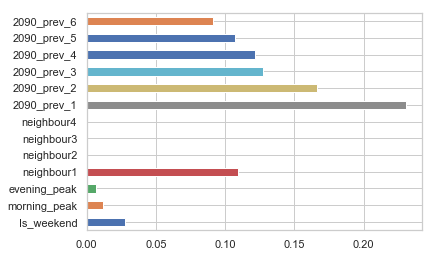

In [156]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=road_2090_X.columns)
feat_importances.plot(kind='barh')

In [157]:
y_predframe=pd.DataFrame(y_pred, columns=['TT']) 
road_2090_y_test=road_2090_y_test.reset_index(drop=True)
dates = dates.reset_index(drop=True)

road_2090_y_test=road_2090_y_test.reset_index(drop=True)

dates = dates.reset_index(drop=True)

# Convert column to datetime
dates['DateTime'] = pd.to_datetime(dates['DateTime'])

cmb = pd.concat([dates, y_predframe, road_2090_y_test], axis=1)

In [158]:
# Melt the data so that it can be plotted with seaborn

cmb_df = cmb.melt('DateTime', var_name='cols', value_name='vals')

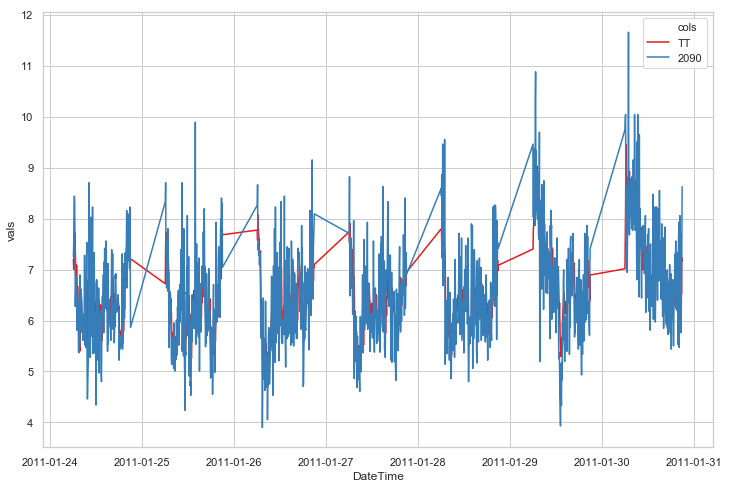

In [159]:
# SEABORN PLOT
plt.figure(figsize=(12, 8))

g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df, palette="Set1")

<Figure size 864x576 with 0 Axes>

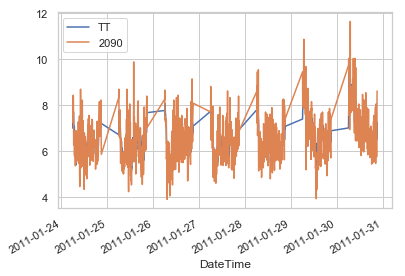

In [160]:
#MATLIB PLOT

plt.figure(figsize=(12, 8))
cmb.plot(x="DateTime", y=["TT", "2090"], kind="line")

## 2097 <a name="2097"></a>

In [161]:
road_2097_X = pd.read_csv('x_2097.csv')
road_2097_y = pd.read_csv('y_2097.csv')

dates = road_2097_y.iloc[:,0:1]
road_2097_y = road_2097_y.iloc[:,1:2]

# First 23 days of data for training
road_2097_X_train = road_2097_X.iloc[0:4134,:]

road_2097_y_train = road_2097_y.iloc[0:4134,:]

# Final 7 days for predicting
road_2097_X_test = road_2097_X.iloc[4134:,:]

road_2097_y_test = road_2097_y.iloc[4134:5394,:]


dates = dates.iloc[4140:,:]


In [162]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
regressor.fit(road_2097_X_train, road_2097_y_train.values.ravel())

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'sqrt', 'n_estimators': 700}


,mean_test_score,std_test_score,params
0,-1.7886,0.2332,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-1.7842,0.2339,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-1.7841,0.2338,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-1.7834,0.2342,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-1.7845,0.2343,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-1.7829,0.2344,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-1.8102,0.2209,"{'max_features': 'auto', 'n_estimators': 200}"
7,-1.8068,0.2246,"{'max_features': 'auto', 'n_estimators': 300}"
8,-1.8119,0.2282,"{'max_features': 'auto', 'n_estimators': 400}"
9,-1.8090,0.2252,"{'max_features': 'auto', 'n_estimators': 500}"


In [163]:
# Use the optimal parameter setting to make predictions
 
y_pred = regressor.predict(road_2097_X_test)
regressor.score(road_2097_X_test, road_2097_y_test)

-1.6104928937157328

In [164]:
print('Mean Absolute Error:', metrics.mean_absolute_error(road_2097_y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(road_2097_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(road_2097_y_test, y_pred))) 
print('R Squared:', metrics.r2_score(road_2097_y_test, y_pred))

Mean Absolute Error: 0.9457250357488202
Mean Squared Error: 1.6104928937157328
Root Mean Squared Error: 1.2690519665150568
R Squared: 0.4279215085972019


Text(0,0.5,'Feature')

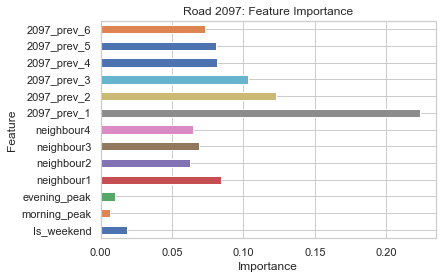

In [165]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=road_2097_X.columns)
feat_importances.plot(kind='barh')

plt.title('Road 2097: Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

In [166]:
y_predframe=pd.DataFrame(y_pred, columns=['TT']) 
road_2097_y_test=road_2097_y_test.reset_index(drop=True)
dates = dates.reset_index(drop=True)

road_2097_y_test=road_2097_y_test.reset_index(drop=True)

dates = dates.reset_index(drop=True)

# Convert column to datetime
dates['DateTime'] = pd.to_datetime(dates['DateTime'])

cmb = pd.concat([dates, y_predframe, road_2097_y_test], axis=1)

In [167]:
# Melt the data so that it can be plotted with seaborn

cmb_df = cmb.melt('DateTime', var_name='cols', value_name='vals')

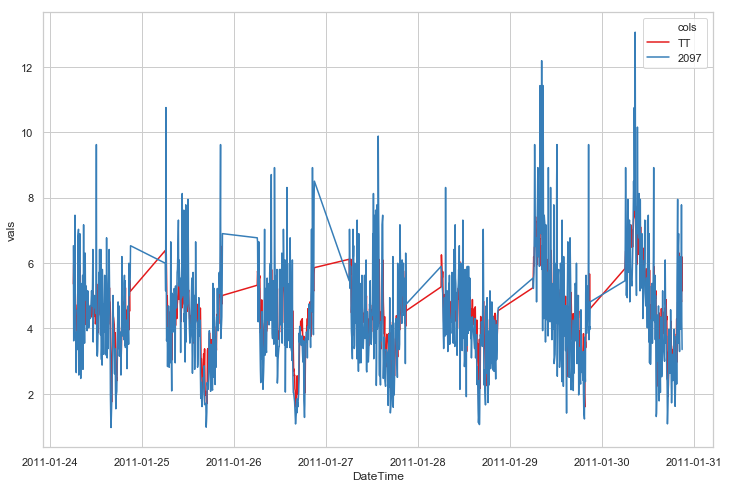

In [168]:
# SEABORN PLOT
plt.figure(figsize=(12, 8))

g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df, palette="Set1")

In [189]:
#MATLIB PLOT

#plt.figure(figsize=(12, 8))
#cmb.plot(x="DateTime", y=["TT", "2097"], kind="line")

## 2260 <a name="2260"></a>

In [190]:
road_2260_X = pd.read_csv('x_2260.csv')
road_2260_y = pd.read_csv('y_2260.csv')

dates = road_2260_y.iloc[:,0:1]
road_2260_y = road_2260_y.iloc[:,1:2]

# First 23 days of data for training
road_2260_X_train = road_2260_X.iloc[0:4134,:]

road_2260_y_train = road_2260_y.iloc[0:4134,:]

# Final 7 days for predicting
road_2260_X_test = road_2260_X.iloc[4134:,:]

road_2260_y_test = road_2260_y.iloc[4134:5394,:]


dates = dates.iloc[4140:,:]


In [191]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
regressor.fit(road_2260_X_train, road_2260_y_train.values.ravel())

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'sqrt', 'n_estimators': 500}


,mean_test_score,std_test_score,params
0,-1.4631,0.3559,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-1.4587,0.3566,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-1.4588,0.3539,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-1.4572,0.3501,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-1.4588,0.3479,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-1.4578,0.3473,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-1.4736,0.3891,"{'max_features': 'auto', 'n_estimators': 200}"
7,-1.4715,0.3859,"{'max_features': 'auto', 'n_estimators': 300}"
8,-1.4668,0.3833,"{'max_features': 'auto', 'n_estimators': 400}"
9,-1.4665,0.3833,"{'max_features': 'auto', 'n_estimators': 500}"


In [192]:
# Use the optimal parameter setting to make predictions
 
y_pred = regressor.predict(road_2260_X_test)
regressor.score(road_2260_X_test, road_2260_y_test)

-0.6429765577482774

In [193]:
print('Mean Absolute Error:', metrics.mean_absolute_error(road_2260_y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(road_2260_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(road_2260_y_test, y_pred))) 
print('R Squared:', metrics.r2_score(road_2260_y_test, y_pred))

Mean Absolute Error: 0.574481901403742
Mean Squared Error: 0.6429765577482774
Root Mean Squared Error: 0.8018581905476039
R Squared: 0.7888669653715034


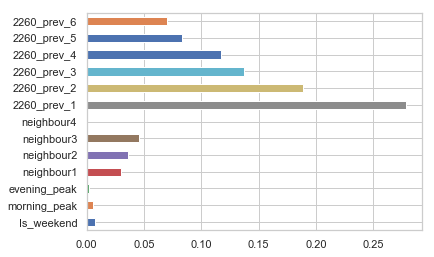

In [194]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=road_2260_X.columns)
feat_importances.plot(kind='barh')

In [195]:
y_predframe=pd.DataFrame(y_pred, columns=['TT']) 
road_2260_y_test=road_2260_y_test.reset_index(drop=True)
dates = dates.reset_index(drop=True)

road_2260_y_test=road_2260_y_test.reset_index(drop=True)

dates = dates.reset_index(drop=True)

# Convert column to datetime
dates['DateTime'] = pd.to_datetime(dates['DateTime'])

cmb = pd.concat([dates, y_predframe, road_2260_y_test], axis=1)

In [196]:
# Melt the data so that it can be plotted with seaborn

cmb_df = cmb.melt('DateTime', var_name='cols', value_name='vals')

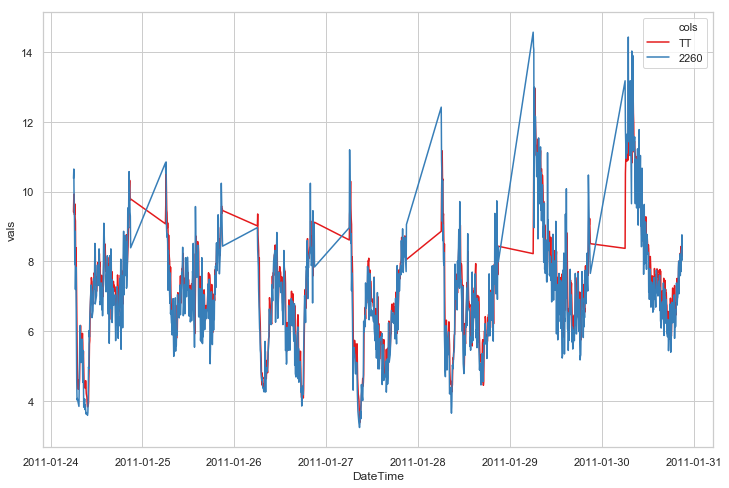

In [197]:
# SEABORN PLOT
plt.figure(figsize=(12, 8))

g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df, palette="Set1")

<Figure size 864x576 with 0 Axes>

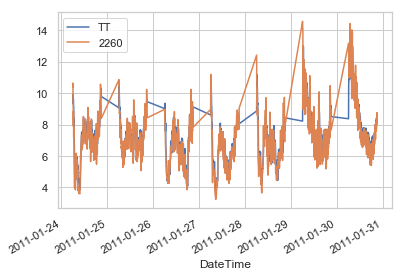

In [198]:
#MATLIB PLOT

plt.figure(figsize=(12, 8))
cmb.plot(x="DateTime", y=["TT", "2260"], kind="line")

## 2261 <a name="2261"></a>

In [199]:
road_2261_X = pd.read_csv('x_2261.csv')
road_2261_y = pd.read_csv('y_2261.csv')

dates = road_2261_y.iloc[:,0:1]
road_2261_y = road_2261_y.iloc[:,1:2]

# First 23 days of data for training
road_2261_X_train = road_2261_X.iloc[0:4134,:]

road_2261_y_train = road_2261_y.iloc[0:4134,:]

# Final 7 days for predicting
road_2261_X_test = road_2261_X.iloc[4134:,:]

road_2261_y_test = road_2261_y.iloc[4134:5394,:]


dates = dates.iloc[4140:,:]


In [200]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
regressor.fit(road_2261_X_train, road_2261_y_train.values.ravel())

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'auto', 'n_estimators': 700}


,mean_test_score,std_test_score,params
0,-0.1691,0.0319,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-0.1683,0.0318,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-0.1685,0.0318,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-0.1685,0.0317,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-0.1681,0.0315,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-0.1679,0.0314,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-0.1647,0.0315,"{'max_features': 'auto', 'n_estimators': 200}"
7,-0.1641,0.0307,"{'max_features': 'auto', 'n_estimators': 300}"
8,-0.1637,0.0301,"{'max_features': 'auto', 'n_estimators': 400}"
9,-0.1638,0.0307,"{'max_features': 'auto', 'n_estimators': 500}"


In [201]:
# Use the optimal parameter setting to make predictions
 
y_pred = regressor.predict(road_2261_X_test)
regressor.score(road_2261_X_test, road_2261_y_test)

-0.23117999623816418

In [202]:
print('Mean Absolute Error:', metrics.mean_absolute_error(road_2261_y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(road_2261_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(road_2261_y_test, y_pred))) 
print('R Squared:', metrics.r2_score(road_2261_y_test, y_pred))

Mean Absolute Error: 0.3425735927816738
Mean Squared Error: 0.23117999623816418
Root Mean Squared Error: 0.4808118095868322
R Squared: 0.8189209957907002


Text(0,0.5,'Feature')

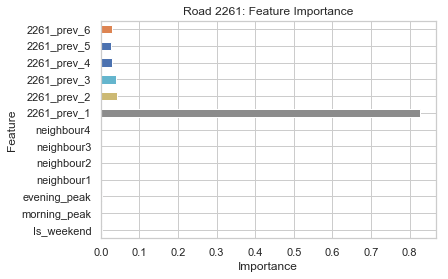

In [203]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=road_2261_X.columns)
feat_importances.plot(kind='barh')

plt.title('Road 2261: Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

In [204]:
y_predframe=pd.DataFrame(y_pred, columns=['TT']) 
road_2261_y_test=road_2261_y_test.reset_index(drop=True)
dates = dates.reset_index(drop=True)

road_2261_y_test=road_2261_y_test.reset_index(drop=True)

dates = dates.reset_index(drop=True)

# Convert column to datetime
dates['DateTime'] = pd.to_datetime(dates['DateTime'])

cmb = pd.concat([dates, y_predframe, road_2261_y_test], axis=1)

# Rename column titles
cmb = cmb.rename(columns={'TT': 'Predicted', '2261': 'Actual'})

In [205]:
# Melt the data so that it can be plotted with seaborn

cmb_df = cmb.melt('DateTime', var_name='cols', value_name='vals')



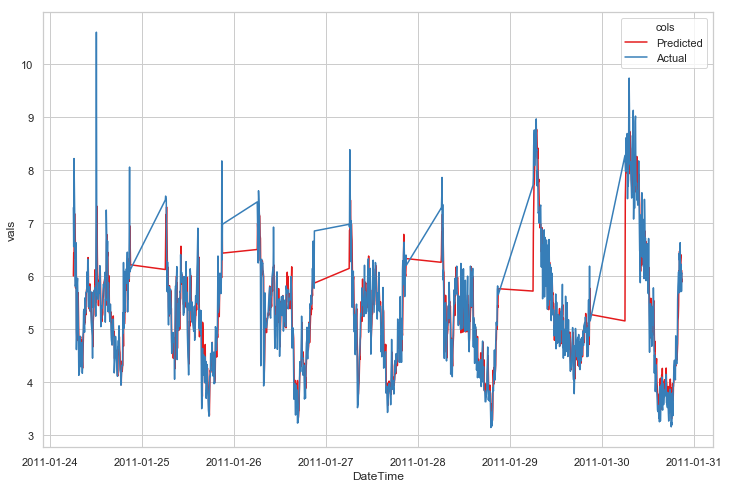

In [206]:
# SEABORN PLOT
plt.figure(figsize=(12, 8))

g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df, palette="Set1")

In [208]:
#MATLIB PLOT

#plt.figure(figsize=(12, 8))
#cmb.plot(x="DateTime", y=["TT", "2261"], kind="line")

## 2282 <a name="2282"></a>

In [209]:
road_2282_X = pd.read_csv('x_2282.csv')
road_2282_y = pd.read_csv('y_2282.csv')

dates = road_2282_y.iloc[:,0:1]
road_2282_y = road_2282_y.iloc[:,1:2]

# First 23 days of data for training
road_2282_X_train = road_2282_X.iloc[0:4134,:]

road_2282_y_train = road_2282_y.iloc[0:4134,:]

# Final 7 days for predicting
road_2282_X_test = road_2282_X.iloc[4134:,:]

road_2282_y_test = road_2282_y.iloc[4134:5394,:]


dates = dates.iloc[4140:,:]


In [210]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
regressor.fit(road_2282_X_train, road_2282_y_train.values.ravel())

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'sqrt', 'n_estimators': 600}


,mean_test_score,std_test_score,params
0,-0.5332,0.0662,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-0.5310,0.0665,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-0.5307,0.0656,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-0.5301,0.0661,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-0.5297,0.0661,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-0.5302,0.0660,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-0.5398,0.0641,"{'max_features': 'auto', 'n_estimators': 200}"
7,-0.5387,0.0654,"{'max_features': 'auto', 'n_estimators': 300}"
8,-0.5386,0.0654,"{'max_features': 'auto', 'n_estimators': 400}"
9,-0.5381,0.0652,"{'max_features': 'auto', 'n_estimators': 500}"


In [211]:
# Use the optimal parameter setting to make predictions
 
y_pred = regressor.predict(road_2282_X_test)
regressor.score(road_2282_X_test, road_2282_y_test)

-0.5324528912999298

In [212]:
print('Mean Absolute Error:', metrics.mean_absolute_error(road_2282_y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(road_2282_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(road_2282_y_test, y_pred)))
print('R Squared:', metrics.r2_score(road_2282_y_test, y_pred))

Mean Absolute Error: 0.548027453050487
Mean Squared Error: 0.5324528912999298
Root Mean Squared Error: 0.7296936969029744
R Squared: 0.8086092951787418


Text(0,0.5,'Feature')

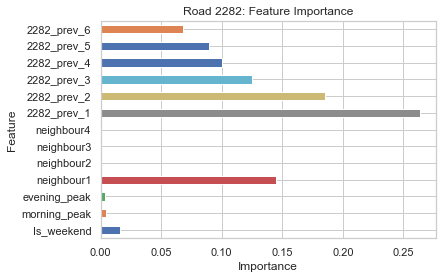

In [213]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=road_2282_X.columns)
feat_importances.plot(kind='barh')

plt.title('Road 2282: Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')


In [214]:
y_predframe=pd.DataFrame(y_pred, columns=['TT']) 
road_2282_y_test=road_2282_y_test.reset_index(drop=True)
dates = dates.reset_index(drop=True)

road_2282_y_test=road_2282_y_test.reset_index(drop=True)

dates = dates.reset_index(drop=True)

# Convert column to datetime
dates['DateTime'] = pd.to_datetime(dates['DateTime'])

cmb = pd.concat([dates, y_predframe, road_2282_y_test], axis=1)

In [215]:
# Melt the data so that it can be plotted with seaborn

cmb_df = cmb.melt('DateTime', var_name='cols', value_name='vals')

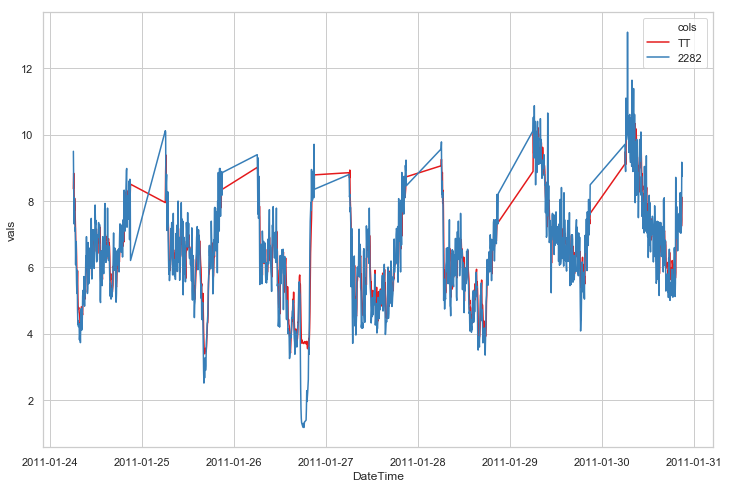

In [216]:
# SEABORN PLOT
plt.figure(figsize=(12, 8))

g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df, palette="Set1")

In [217]:
#MATLIB PLOT

#plt.figure(figsize=(12, 8))
#cmb.plot(x="DateTime", y=["TT", "2282"], kind="line")

## 2416 <a name="2416"></a>

In [218]:
road_2416_X = pd.read_csv('x_2416.csv')
road_2416_y = pd.read_csv('y_2416.csv')

dates = road_2416_y.iloc[:,0:1]
road_2416_y = road_2416_y.iloc[:,1:2]

# First 23 days of data for training
road_2416_X_train = road_2416_X.iloc[0:4134,:]

road_2416_y_train = road_2416_y.iloc[0:4134,:]

# Final 7 days for predicting
road_2416_X_test = road_2416_X.iloc[4134:,:]

road_2416_y_test = road_2416_y.iloc[4134:5394,:]


dates = dates.iloc[4140:,:]


In [219]:
# Setup our parameters for the Random Forest grid search with the hyperparameters discussed above.
parameters = {'n_estimators' : [200, 300, 400, 500, 600, 700], 'max_features': ['sqrt', 'auto']}

# Perform the grid search for the Random Forest regression based on our parameters.
# In the cross validation, we are using 5 k-folds and the standard accuracy scoring measure. 
regressor = GridSearchCV(RandomForestRegressor(random_state=1234), parameters, cv=5, scoring ='neg_mean_squared_error', return_train_score=True)

# Finally, run the grid search on our testing and training data
regressor.fit(road_2416_X_train, road_2416_y_train.values.ravel())

# Print out the scores of the different parameters
print("The best parameters identified are: " + str(regressor.best_params_))
result = pd.DataFrame(regressor.cv_results_)
result[['mean_test_score', 'std_test_score', 'params']]

The best parameters identified are: {'max_features': 'sqrt', 'n_estimators': 700}


,mean_test_score,std_test_score,params
0,-3.8992,1.2679,"{'max_features': 'sqrt', 'n_estimators': 200}"
1,-3.8805,1.2318,"{'max_features': 'sqrt', 'n_estimators': 300}"
2,-3.8762,1.2318,"{'max_features': 'sqrt', 'n_estimators': 400}"
3,-3.8641,1.2308,"{'max_features': 'sqrt', 'n_estimators': 500}"
4,-3.8655,1.2290,"{'max_features': 'sqrt', 'n_estimators': 600}"
5,-3.8612,1.2282,"{'max_features': 'sqrt', 'n_estimators': 700}"
6,-3.9956,1.1535,"{'max_features': 'auto', 'n_estimators': 200}"
7,-3.9918,1.1611,"{'max_features': 'auto', 'n_estimators': 300}"
8,-3.9912,1.1561,"{'max_features': 'auto', 'n_estimators': 400}"
9,-3.9862,1.1532,"{'max_features': 'auto', 'n_estimators': 500}"


In [220]:
# Use the optimal parameter setting to make predictions
 
y_pred = regressor.predict(road_2416_X_test)
regressor.score(road_2416_X_test, road_2416_y_test)

-1.6636244420262654

In [221]:
print('Mean Absolute Error:', metrics.mean_absolute_error(road_2416_y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(road_2416_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(road_2416_y_test, y_pred))) 
print('R Squared:', metrics.r2_score(road_2416_y_test, y_pred))

Mean Absolute Error: 0.9256286959200246
Mean Squared Error: 1.6636244420262654
Root Mean Squared Error: 1.2898156620332477
R Squared: 0.59770701219096


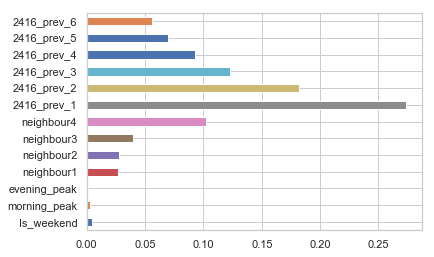

In [222]:
feat_importances = pd.Series(regressor.best_estimator_.feature_importances_, index=road_2416_X.columns)
feat_importances.plot(kind='barh')

In [223]:
y_predframe=pd.DataFrame(y_pred, columns=['TT']) 
road_2416_y_test=road_2416_y_test.reset_index(drop=True)
dates = dates.reset_index(drop=True)

road_2416_y_test=road_2416_y_test.reset_index(drop=True)

dates = dates.reset_index(drop=True)

# Convert column to datetime
dates['DateTime'] = pd.to_datetime(dates['DateTime'])

cmb = pd.concat([dates, y_predframe, road_2416_y_test], axis=1)

In [224]:
# Melt the data so that it can be plotted with seaborn

cmb_df = cmb.melt('DateTime', var_name='cols', value_name='vals')

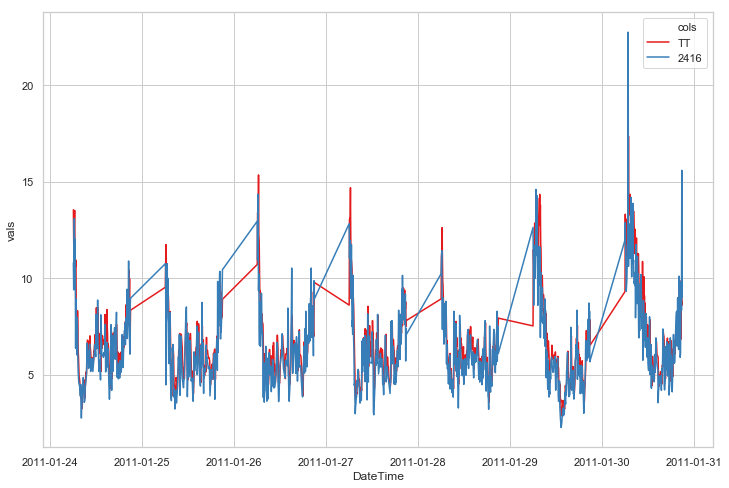

In [225]:
# SEABORN PLOT
plt.figure(figsize=(12, 8))

g = sns.lineplot(x="DateTime", y="vals", hue='cols', data=cmb_df, palette="Set1")

In [226]:
#MATLIB PLOT

#plt.figure(figsize=(12, 8))
#cmb.plot(x="DateTime", y=["TT", "2416"], kind="line")